# Imports
## Import Data science packages

In [1]:
import numpy as np
import pandas as pd
import os 
import re
import matplotlib.pyplot as plt


## Import geolocalisation data

In [26]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

ModuleNotFoundError: No module named 'geopandas'

## Import helpers

In [3]:
class Process:
    def __init__(self, path, filename):
        self.path = path
        self.imported_data = pd.read_csv(f'{path}{filename}', sep=';', low_memory=False)
        self.processed_data = self.imported_data.copy()
        print("CSV imported")
        # ------------- METHODS APPLIED UPON INIT ------------ #

        #self.compute_nan_P()
        self._columns_title_format()
        self.replace_space()
        self.data_desc()
        # ------------- METHODS APPLIED UPON INIT ------------ #
    def _columns_title_format(self):
        data_columns = list(self.processed_data.columns)
        data_columns = [col.replace(' ', '_').capitalize() for col in data_columns]
        self.processed_data.columns = data_columns
        print("Formatted columns title")
        return self.processed_data
   
       # Function for replacing space with '_' in columns of a df
    def replace_space(self):
        df = self.processed_data.select_dtypes(include=['object'])
        df = df.stack().str.replace(' ', '_').unstack()
        # modif du 8/2/2023
        for col in df.columns:
            self.processed_data[col] = df[col]
        return self.processed_data
    # Function for quickly describing the data
    def data_desc(self):
        print(self.processed_data.dropna(how = 'all').shape) #pour voir si certaines lignes comportent des valeurs NaN partout (Non)
        return(self.processed_data.info())
        # -------------- METHODS FOR DETECTING AND DISCARDING STATISTICALLY INSIGNIFICANT COLUMNS --------- #
 ## Discard statistically insignificant features
    def compute_nan_P(self):
        data_isna_P = (self.processed_data.isna().sum()) * 100/len(self.processed_data)
        cols = [x for x in range (self.processed_data.shape[1])]
        count =0
        print("Printing removed columns...")
        for ii in data_isna_P.index:
            count +=1
            if (data_isna_P[ii] > 55):
                cols.remove(count-1)
                print ("\t", ii)
            else:
                continue
        self.processed_data = self.processed_data.iloc[:, cols]

In [4]:
# DISCARD NAN COLUMNS
def droping_nan_variable(df, variable_col):
    # variable_Col must be given between quotations
    cond2_droping_nan_Variable = df[variable_col].notna()
    df_new_data = df[cond2_droping_nan_Variable]
    return df_new_data

In [5]:
# Function to create a new dataframe with column types
def col_type_table(df_clean):
# Create a dataframe to store the column names and data types
    df_data_type = pd.DataFrame({'Colonne' : list(df_clean.columns)})
    return df_data_type

# Add a new column to indicate the type of each column
def get_column_type(col):
    if address_pattern.search(col):
        return 'adresse'
    elif date_pattern.search(col):
        return 'date'
    elif geo_pattern.search(col):
        return 'coordonnées géographiques'
    else:
        return 'autre'

#Method to convert any date columns to datetime : 1st method 
# (takes into account only cases where date formats vary across columns)
def convert_to_datetime(df, date_columns):
    for col in date_columns:
        # Try different date formats one by one
        for fmt in [
        '%Y-%m-%d %H:%M:%S',
        '%Y-%m-%d',
        '%d-%m-%Y %H:%M:%S',
        '%d-%m-%Y',
        '%m/%d/%Y %H:%M:%S',
        '%m/%d/%Y',
        '%m-%d-%Y %H:%M:%S',
        '%m-%d-%Y',
        '%d/%m/%Y %H:%M:%S',
        '%d/%m/%Y_%H:%M',
        '%d/%m/%Y']:
            try:
                # Try to convert the column to datetime using the current format
                df[col] = pd.to_datetime(df[col], format=fmt)
                print(f"Format {fmt} worked for column {col}")
                break # If successful, break out of the loop and move to the next column
            except:
                print(f"Format {fmt} didn't work for column {col}")
                pass # If conversion fails, move to the next format
    return df

#Method to convert any date columns to datetime : 2nd method 
# (takes into account cases where date formats vary across rows within the same column)
def convert_to_datetime_bis(df, date_columns):
    for col in date_columns:
        # Check if the column contains any non-string values
        if np.issubdtype(df[col].dtype, np.number):
            # Convert float values to string
            df[col] = df[col].astype(str)
        # Iterate over each value in the column
        # Convert string values to datetime using dateutil.parser.parse
        df[col] = [dateutil.parser.parse(x) for x in df[col]]
    return df
# Methode redondante avec la detection des types de colonnes plus haut

def is_date(string, fuzzy=False):
    """
    Return whether the string can be interpreted as a date.

    :param string: str, string to check for date
    :param fuzzy: bool, ignore unknown tokens in string if True
    """
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False

# Function to detect projections in Geocoordinates
def detect_projection(df, lon_col, lat_col):
    
    # Check if the values in the longitude and latitude columns are within geographic coordinate range
    geo_mask = (df[lon_col] >= -180) & (df[lon_col] <= 180) & \
               (df[lat_col] >= -90) & (df[lat_col] <= 90)
    
    # Create a new column 'Projection' with the corresponding values
    df['Projection'] = np.where(geo_mask, 'Not_projected', 'Projected')
    
    return df

In [6]:
def boxPlotAll(df):
    '''Show box plots for each feature'''
    
    # Select just the numeric features
    df = df.select_dtypes(include=[np.number])

    # Compute the layout grid size
    data_cols = len(df.columns)
    unit_size = 5
    layout_cols = 4
    layout_rows = int(data_cols/layout_cols+layout_cols)

    # Make the plots
    df.plot(kind='box', subplots=True, figsize=(layout_cols*unit_size+1,layout_rows*unit_size+1), layout=(layout_rows,layout_cols))

    plt.show()

## Import Data

In [7]:
## DATA PATH
path_to_data = ('/Users/souha_kassab/Documents/git_repos/qualigeoenvi/static/')
Unique_Labels_List = os.listdir(path_to_data)
filename = Unique_Labels_List[0]
filename


'Installations classées.csv'

# Prep data for cleaning
## Format column entries

In [8]:
process = Process(path=path_to_data, filename=filename)


CSV imported
Formatted columns title
(125117, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125117 entries, 0 to 125116
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Numéro_d'inspection          125117 non-null  int64  
 1   Nom_établissement            125012 non-null  object 
 2   Adresse_1                    112361 non-null  object 
 3   Adresse_2                    36143 non-null   object 
 4   Adresse_3                    183 non-null     object 
 5   Code_postal                  125012 non-null  float64
 6   Commune                      125012 non-null  object 
 7   Régime_en_vigueur            125117 non-null  object 
 8   Statut_seveso                61954 non-null   object 
 9   Date_de_dernière_inspection  32690 non-null   object 
 10  Unnamed:_10                  0 non-null       float64
 11  Unnamed:_11                  0 non-null       float64
 12  Unnamed:

In [9]:
df_clean = process.processed_data

## Visualize data

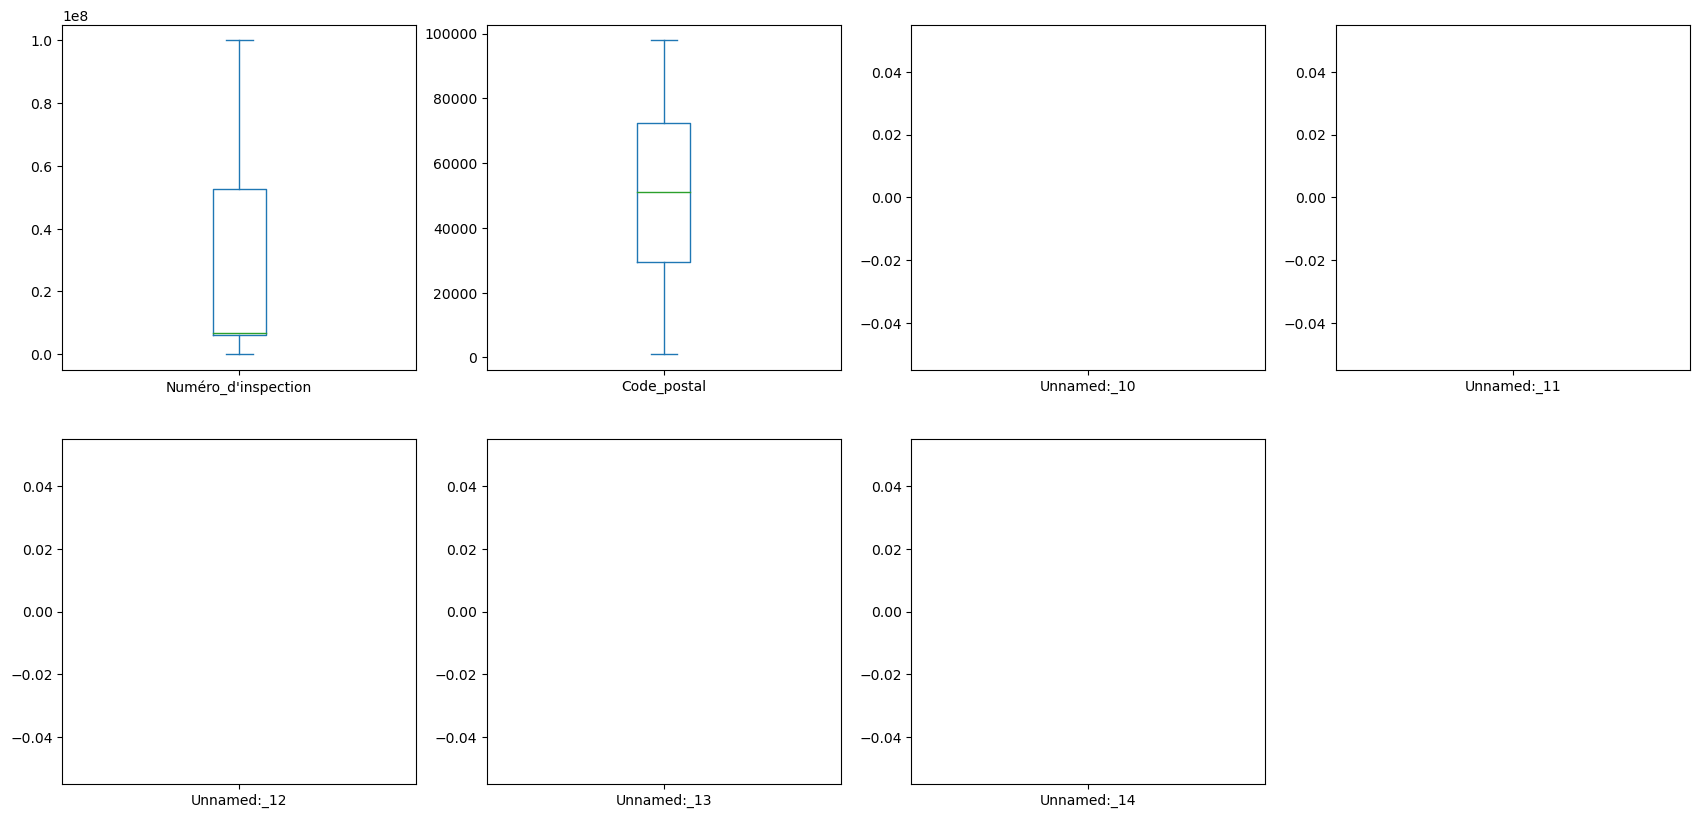

In [10]:
boxPlotAll(df_clean)

## Get column types

In [11]:
df_data_type = col_type_table(df_clean)
df_data_type

,Colonne
0,Numéro_d'inspection
1,Nom_établissement
2,Adresse_1
3,Adresse_2
4,Adresse_3
5,Code_postal
6,Commune
7,Régime_en_vigueur
8,Statut_seveso
9,Date_de_dernière_inspection


In [12]:
# Define regular expression patterns to match address-related, date-related, geo coordinates keywords
address_pattern = re.compile(r'(adresse|rue|avenue|boulevard|passage|voie|chemin|allée|ville|commune|code\s*postal|pays)', flags=re.IGNORECASE)
date_pattern = re.compile(r'(date|début|fin|année|jour|heure|période|temps|durée)', flags=re.IGNORECASE)
geo_pattern = re.compile(r'(longitude|latitude)', flags=re.IGNORECASE)


In [13]:
# Create a dataframe to store the column names and data types
df_data_type['Colonne_type'] = df_data_type['Colonne'].apply(get_column_type)
# Print the dataframe
print(df_data_type)

                        Colonne Colonne_type
0           Numéro_d'inspection        autre
1             Nom_établissement        autre
2                     Adresse_1      adresse
3                     Adresse_2      adresse
4                     Adresse_3      adresse
5                   Code_postal        autre
6                       Commune      adresse
7             Régime_en_vigueur        autre
8                 Statut_seveso        autre
9   Date_de_dernière_inspection         date
10                  Unnamed:_10        autre
11                  Unnamed:_11        autre
12                  Unnamed:_12        autre
13                  Unnamed:_13        autre
14                  Unnamed:_14        autre
15                  Unnamed:_15        autre


## Handling Adresses in original dataframe

In [14]:
# CONDITION DE COMPLETION DES ADRESSES
def completion_adresses(df_clean, cond_adresse):
    if (cond_adresse.empty is True):
        print("Pas d'adresses dans ce tableau") 
    else:
#df_clean['adresse_complete'] = ''
        for row in cond_adresse['Colonne']:
            if (df_clean[row].isna().sum() == 0):
                for ii in range(0,len(df_clean)):
                    df_clean.loc[ii, 'adresse_complete'] += df_clean.loc[ii,row]
                print(row)
            else:
                print ("Pas d'adresse complète")
    return df_clean

In [15]:
cond_adresse = df_data_type[df_data_type['Colonne_type'] == 'adresse']
filtered_adresses = df_clean[cond_adresse['Colonne']]
for col in filtered_adresses.columns:
    print(col)


Adresse_1
Adresse_2
Adresse_3
Commune


In [16]:
if filtered_adresses.shape[1] >0:
    print(filtered_adresses.describe())

                Adresse_1 Adresse_2            Adresse_3     Commune
count              112361     36143                  183      125012
unique              99218     29763                  176       27701
top     Zone_Industrielle        ZI  94012_CRETEIL_CEDEX  STRASBOURG
freq                  191       118                    3         288


In [17]:
completion_adresses(df_clean=df_clean, cond_adresse=cond_adresse)

Pas d'adresse complète
Pas d'adresse complète
Pas d'adresse complète
Pas d'adresse complète


,Numéro_d'inspection,Nom_établissement,Adresse_1,Adresse_2,Adresse_3,Code_postal,Commune,Régime_en_vigueur,Statut_seveso,Date_de_dernière_inspection,Unnamed:_10,Unnamed:_11,Unnamed:_12,Unnamed:_13,Unnamed:_14,Unnamed:_15
0,5,ORLEANS_METROPOLE_-_Parc_de_Loire,5_PL_DU_6_JUIN_1944,ESPACE_SAINT_MARC,45058_ORLEANS_CEDEX_1,45000.0,ORLEANS,Autorisation,Non_Seveso,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,GRANUPLAST_FRANCE,754_rue_de_la_liberté,ZI_la_grande_borne,NaN,1480.0,Jassans-Riottier,Autorisation,Non_Seveso,08/03/2022,NaN,NaN,NaN,NaN,NaN,NaN
2,39,COVED_Environnement,Le_Razas,NaN,NaN,26780.0,Malataverne,Autorisation,Non_Seveso,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3012003,ENGIE_ENERGIE_SERVICES_(Novawood),chemin_du_Vaquené,NaN,NaN,54410.0,LANEUVEVILLE_DEVANT_NANCY,Autres_régimes,NaN,31/03/2022,NaN,NaN,NaN,NaN,NaN,NaN
4,3012004,PROMOCASH,ZA_FARMAN,RUE_PAUL_MARIO,NaN,51100.0,REIMS,Autres_régimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125112,100013530,TotalEnergies_Marketing_France_-_relais_de_Cus...,41_rue_du_général_Leclerc,NaN,NaN,54670.0,Custines,Autres_régimes,NaN,31/01/2023,NaN,NaN,NaN,NaN,NaN,NaN
125113,100013538,Station_AVIA,1_route_de_Nancy,NaN,NaN,54610.0,Nomeny,Autres_régimes,NaN,23/01/2023,NaN,NaN,NaN,NaN,NaN,NaN
125114,100013570,BOIS_AUTO_PALETTES,64_RN3,NaN,NaN,77124.0,Chauconin-Neufmontiers,Autres_régimes,NaN,26/01/2023,NaN,NaN,NaN,NaN,NaN,NaN
125115,100013684,DE_SAINT-REMY_Laure,1_Route_de_la_Chenillée,La_Noue,NaN,85540.0,Saint-Vincent-sur-Graon,Autres_régimes,NaN,02/02/2023,NaN,NaN,NaN,NaN,NaN,NaN


## Handling dates in original dataframe

In [18]:
# Print the column names
print(df_clean.columns)

# Define the regular expression pattern to match the keywords
print(date_pattern )

# Find the columns that match the date pattern
date_cols = list(filter(date_pattern.search, df_clean.columns))
## Test that dates columns are well detected
cond_date = df_data_type[df_data_type['Colonne_type'] == 'date']
cond_date

Index(['Numéro_d'inspection', 'Nom_établissement', 'Adresse_1', 'Adresse_2',
       'Adresse_3', 'Code_postal', 'Commune', 'Régime_en_vigueur',
       'Statut_seveso', 'Date_de_dernière_inspection', 'Unnamed:_10',
       'Unnamed:_11', 'Unnamed:_12', 'Unnamed:_13', 'Unnamed:_14',
       'Unnamed:_15'],
      dtype='object')
re.compile('(date|début|fin|année|jour|heure|période|temps|durée)', re.IGNORECASE)


,Colonne,Colonne_type
9,Date_de_dernière_inspection,date


In [19]:
# Print the date columns
print(date_cols)
## Detect column dates
convert_to_datetime(df_clean, date_cols)
df_clean.info()

['Date_de_dernière_inspection']
Format %Y-%m-%d %H:%M:%S didn't work for column Date_de_dernière_inspection
Format %Y-%m-%d didn't work for column Date_de_dernière_inspection
Format %d-%m-%Y %H:%M:%S didn't work for column Date_de_dernière_inspection
Format %d-%m-%Y didn't work for column Date_de_dernière_inspection
Format %m/%d/%Y %H:%M:%S didn't work for column Date_de_dernière_inspection
Format %m/%d/%Y didn't work for column Date_de_dernière_inspection
Format %m-%d-%Y %H:%M:%S didn't work for column Date_de_dernière_inspection
Format %m-%d-%Y didn't work for column Date_de_dernière_inspection
Format %d/%m/%Y %H:%M:%S didn't work for column Date_de_dernière_inspection
Format %d/%m/%Y_%H:%M didn't work for column Date_de_dernière_inspection
Format %d/%m/%Y didn't work for column Date_de_dernière_inspection
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125117 entries, 0 to 125116
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  -----

In [20]:
cond_date

,Colonne,Colonne_type
9,Date_de_dernière_inspection,date


In [21]:
filtered_dates = df_clean[cond_date['Colonne']]
for col in filtered_dates.columns:
    print(col)

Date_de_dernière_inspection


In [22]:
# create a dataframe with the statistical information of a variable
filtered_dates.describe(datetime_is_numeric=True)

,Date_de_dernière_inspection
count,32690
unique,3661
top,06/10/2022
freq,160


##------- code works so far on INstallations_classees --------- ##

In [23]:
print(filtered_dates.max())

Series([], dtype: float64)


/var/folders/xx/m7dpq0_56k9crnft1k608cb80000gn/T/ipykernel_30288/4259447541.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(filtered_dates.max())


In [ ]:
droping_nan_variable(filtered_dates, ['Date_de_début', 'Date_de_fin'])